In [14]:
# In this notebook I am going to build the kmeans model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functions import *

In [2]:
data_lakes_mean = pd.read_csv("out\processed_data_lakes_mean.csv", encoding = 'cp1252')
data_lakes_mean.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,TemperatureC_mean,Dissolved Oxygen_mg/L_mean,pH_mean,Conductivity_mhos/cm_mean,BOD_mg/L_mean,Nitrate_N_mg/L_mean,Fecal_Coliform_MPN/100ml_mean,Total_Coliform_MPN/100ml_mean
0,4368,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,25.5,4.85,7.50,2702.5,2.40,2.310,15.0,165.0
1,2353,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,27.5,4.90,7.35,889.0,3.25,2.165,19.0,195.0
2,1790,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,21.0,5.10,7.70,42450.0,2.60,1.420,3.0,98.5
3,4391,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,25.5,5.80,7.10,328.0,1.75,1.320,194.5,359.5
4,4921,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,25.5,5.95,7.65,615.0,1.65,0.675,166.0,483.5


Text(0, 0.5, 'pH_mean')

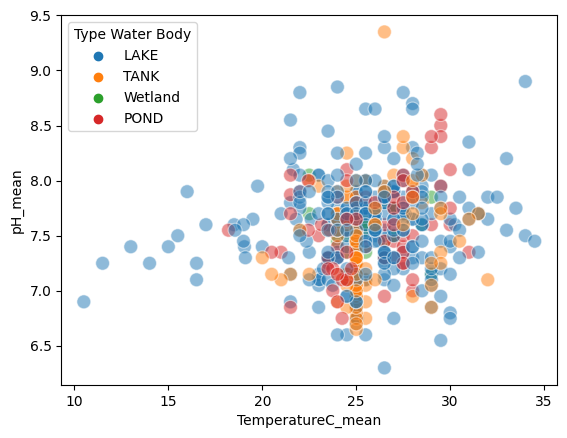

In [8]:
# Scatterplot Ph vs Total coliform
sns.scatterplot(data=data_lakes_mean, x='TemperatureC_mean', y='pH_mean', alpha=1/2, hue="Type Water Body", s=100) 
plt.xlabel('TemperatureC_mean', fontsize = 10)
plt.ylabel('pH_mean', fontsize = 10)

In [10]:
# Data for the model
data_lakes_mean_kmeans = data_lakes_mean.iloc[:,4:]
data_lakes_mean_kmeans.head()

,TemperatureC_mean,Dissolved Oxygen_mg/L_mean,pH_mean,Conductivity_mhos/cm_mean,BOD_mg/L_mean,Nitrate_N_mg/L_mean,Fecal_Coliform_MPN/100ml_mean,Total_Coliform_MPN/100ml_mean
0,25.5,4.85,7.50,2702.5,2.40,2.310,15.0,165.0
1,27.5,4.90,7.35,889.0,3.25,2.165,19.0,195.0
2,21.0,5.10,7.70,42450.0,2.60,1.420,3.0,98.5
3,25.5,5.80,7.10,328.0,1.75,1.320,194.5,359.5
4,25.5,5.95,7.65,615.0,1.65,0.675,166.0,483.5


In [16]:
# Elbow function
def elbow_method(x2,data):
    wcss = []
    for i in range(1, x2): # de uno a 11 es?
        kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, x2), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    return elbow_method

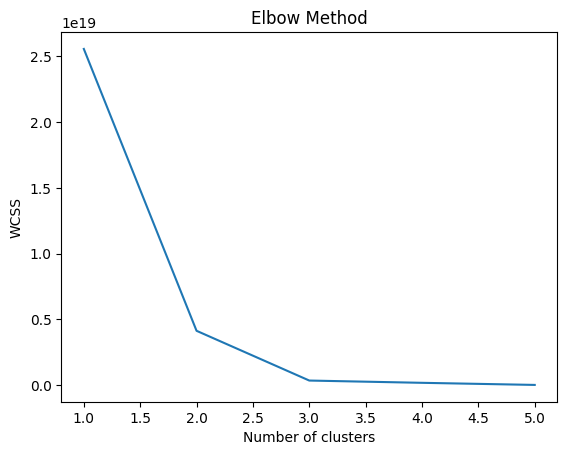

<function __main__.elbow_method(x2, data)>

In [19]:
# Elbow chart
from sklearn.cluster import KMeans

elbow_method(6, data_lakes_mean_kmeans)

# 3 clusters is the final number of cluster to take into account

In [25]:
model_kmeans = KMeans(n_clusters = 3, max_iter = 1000)
model_kmeans.fit(data_lakes_mean_kmeans) 
y_labels = model_kmeans.labels_ # the final model labels
print(y_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [28]:
# Add to the dataframe
data_lakes_mean['Kmeans_groups'] = y_labels.tolist()
data_lakes_mean.head()


,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,TemperatureC_mean,Dissolved Oxygen_mg/L_mean,pH_mean,Conductivity_mhos/cm_mean,BOD_mg/L_mean,Nitrate_N_mg/L_mean,Fecal_Coliform_MPN/100ml_mean,Total_Coliform_MPN/100ml_mean,Kmeans_groups
0,4368,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,25.5,4.85,7.50,2702.5,2.40,2.310,15.0,165.0,0
1,2353,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,27.5,4.90,7.35,889.0,3.25,2.165,19.0,195.0,0
2,1790,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,21.0,5.10,7.70,42450.0,2.60,1.420,3.0,98.5,0
3,4391,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,25.5,5.80,7.10,328.0,1.75,1.320,194.5,359.5,0
4,4921,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,25.5,5.95,7.65,615.0,1.65,0.675,166.0,483.5,0


Text(0, 0.5, 'pH_mean')

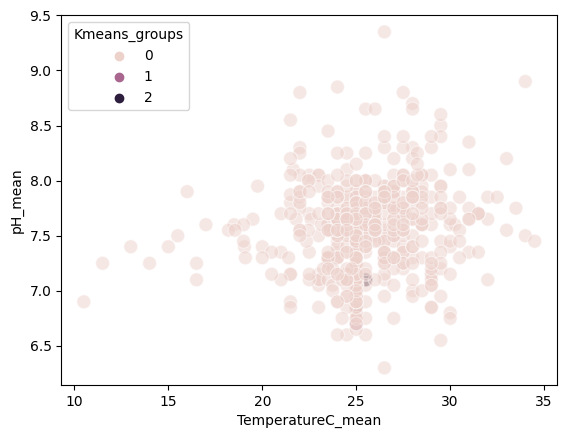

In [29]:
# Scatterplot Ph vs Total coliform
sns.scatterplot(data=data_lakes_mean, x='TemperatureC_mean', y='pH_mean', alpha=1/2, hue="Kmeans_groups", s=100) 
plt.xlabel('TemperatureC_mean', fontsize = 10)
plt.ylabel('pH_mean', fontsize = 10)

In [30]:
# Save to CSV
data_lakes_mean.to_csv("out\processed_data_lakes_kmeans.csv")

# The aren't the enough differences between the dataset, so the kmeans groups weren't successful